<a href="https://colab.research.google.com/github/ReynadelYolo/ML_Projects/blob/main/Chatbot_Analytics_V1_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets sweetviz

from datasets import load_dataset


dataset = load_dataset("electricsheepafrica/nigerian-telecom-chatbot-and-live-chat-logs")

print(dataset)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 105.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

chatbot_and_live_chat_logs.parquet:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['session_id', 'session_start', 'session_end', 'duration_seconds', 'customer_id', 'operator', 'channel', 'intent', 'handled_by', 'escalated_to_human', 'message_count', 'resolved', 'customer_satisfaction', 'language'],
        num_rows: 400000
    })
})


In [2]:
import pandas as pd

# Convert the 'train' split to a Pandas DataFrame
df = dataset['train'].to_pandas()

# Display the first few rows
df.head()

,session_id,session_start,session_end,duration_seconds,customer_id,operator,channel,intent,handled_by,escalated_to_human,message_count,resolved,customer_satisfaction,language
0,CHAT00000001,2025-09-16 06:01:00,2025-09-16 06:02:47,107,CUST5465481,MTN,whatsapp,port_number,bot,False,14,True,5,english
1,CHAT00000002,2025-09-03 00:38:00,2025-09-03 00:42:49,289,CUST7117483,Airtel,app,port_number,bot,False,21,True,5,english
2,CHAT00000003,2025-09-09 01:23:00,2025-09-09 01:36:55,835,CUST4948915,MTN,app,port_number,human,True,6,True,3,english
3,CHAT00000004,2025-09-04 11:21:00,2025-09-04 11:33:36,756,CUST1858299,MTN,app,recharge_issue,human,True,25,True,4,english
4,CHAT00000005,2025-09-13 03:09:00,2025-09-13 03:11:11,131,CUST8344247,Airtel,web,port_number,bot,False,18,True,1,pidgin


In [3]:
print(df.isnull().sum())

session_id               0
session_start            0
session_end              0
duration_seconds         0
customer_id              0
operator                 0
channel                  0
intent                   0
handled_by               0
escalated_to_human       0
message_count            0
resolved                 0
customer_satisfaction    0
language                 0
dtype: int64


In [4]:
# Access the first row
print(dataset['train'][0])

# Access a specific column
print(dataset['train']['language'][:5])

{'session_id': 'CHAT00000001', 'session_start': Timestamp('2025-09-16 06:01:00'), 'session_end': Timestamp('2025-09-16 06:02:47'), 'duration_seconds': 107, 'customer_id': 'CUST5465481', 'operator': 'MTN', 'channel': 'whatsapp', 'intent': 'port_number', 'handled_by': 'bot', 'escalated_to_human': False, 'message_count': 14, 'resolved': True, 'customer_satisfaction': 5, 'language': 'english'}
['english', 'english', 'english', 'english', 'pidgin']


In [5]:
print(f"Dataset Shape: {df.shape}")
df.info() # Check for nulls and data types

Dataset Shape: (400000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   session_id             400000 non-null  object        
 1   session_start          400000 non-null  datetime64[ns]
 2   session_end            400000 non-null  datetime64[ns]
 3   duration_seconds       400000 non-null  int64         
 4   customer_id            400000 non-null  object        
 5   operator               400000 non-null  object        
 6   channel                400000 non-null  object        
 7   intent                 400000 non-null  object        
 8   handled_by             400000 non-null  object        
 9   escalated_to_human     400000 non-null  bool          
 10  message_count          400000 non-null  int64         
 11  resolved               400000 non-null  bool          
 12  customer_satisfa

In [6]:
# =============================================================================
# CELL 1: SYNTHETIC DATA ADDITION
# =============================================================================

import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 1. SEX
df['sex'] = df['session_id'].apply(lambda x: 'Male' if hash(x) % 2 == 0 else 'Female')

# 2. AGE
def assign_age(session_id):
    np.random.seed(hash(session_id + 'age') % 10000)
    return min(max(int(np.random.beta(2, 5) * 47 + 18), 18), 65)
df['age'] = df['session_id'].apply(assign_age)

# 3. ZONE
zone_weights = {'South West': 0.28, 'North West': 0.22, 'North Central': 0.16,
                'South South': 0.14, 'South East': 0.12, 'North East': 0.08}
def assign_zone(session_id):
    np.random.seed(hash(session_id + 'zone') % 10000)
    return np.random.choice(list(zone_weights.keys()), p=list(zone_weights.values()))
df['zone'] = df['session_id'].apply(assign_zone)

# 4. MONTH
month_weights = [0.09, 0.07, 0.08, 0.08, 0.08, 0.07, 0.08, 0.08, 0.08, 0.09, 0.09, 0.11]
def assign_month(session_id):
    np.random.seed(hash(session_id + 'month') % 10000)
    return np.random.choice(range(1, 13), p=month_weights)
df['month'] = df['session_id'].apply(assign_month)

# 5. ESCALATION (~8.5%)
intent_escalation_rates = {
    'check_balance': 0.02, 'check_data_balance': 0.03, 'tariff_info': 0.04,
    'buy_data': 0.05, 'general_inquiry': 0.06, 'bill_inquiry': 0.08,
    'recharge_issue': 0.12, 'port_number': 0.15, 'network_issue': 0.18, 'complaint': 0.22
}

def assign_escalation(row):
    base_rate = intent_escalation_rates.get(row['intent'], 0.05)
    if row['duration_seconds'] > 600:
        base_rate += 0.05
    np.random.seed(hash(row['session_id'] + 'escalation') % 10000)
    return np.random.random() < base_rate

df['escalated_to_human'] = df.apply(assign_escalation, axis=1)

# 6. DIRECT HUMAN ROUTING (separate from escalation)
direct_human_rates = {
    'check_balance': 0.05, 'check_data_balance': 0.08, 'tariff_info': 0.10,
    'buy_data': 0.12, 'general_inquiry': 0.15, 'bill_inquiry': 0.25,
    'recharge_issue': 0.35, 'port_number': 0.45, 'network_issue': 0.40, 'complaint': 0.50
}

def assign_direct_human(row):
    if row['escalated_to_human']:
        return False  # Not direct - it's escalation
    np.random.seed(hash(row['session_id'] + 'direct_human') % 10000)
    return np.random.random() < direct_human_rates.get(row['intent'], 0.10)

df['direct_to_human'] = df.apply(assign_direct_human, axis=1)

# 7. FINAL HANDLED_BY
df['handled_by'] = df.apply(
    lambda row: 'human' if row['escalated_to_human'] or row['direct_to_human'] else 'bot',
    axis=1
)

# VERIFICATION
print(f"""
📊 ROUTING SUMMARY:
Escalated to Human: {df['escalated_to_human'].sum():,} ({df['escalated_to_human'].mean()*100:.1f}%)
Direct to Human: {df['direct_to_human'].sum():,} ({df['direct_to_human'].mean()*100:.1f}%)
Total Human: {(df['handled_by']=='human').sum():,} ({(df['handled_by']=='human').mean()*100:.1f}%)
Bot Handled: {(df['handled_by']=='bot').sum():,} ({(df['handled_by']=='bot').mean()*100:.1f}%)
""")

# 8. CONVERSATION TEXT & SENTIMENT
conversation_templates = {
    'check_balance': [("How do I check my balance?", "neutral"), ("What's my balance?", "neutral")],
    'check_data_balance': [("How much data do I have left?", "neutral"), ("Check my data balance", "neutral")],
    'tariff_info': [("What are your tariff plans?", "neutral"), ("Tell me about call rates", "neutral")],
    'buy_data': [("I want to buy data", "neutral"), ("Data purchase please", "neutral"), ("Data finished too fast!", "negative")],
    'general_inquiry': [("I have a question", "neutral"), ("Can you help me?", "neutral"), ("Thanks for the help!", "positive")],
    'bill_inquiry': [("Explain my bill please", "neutral"), ("Why is my bill so high?", "negative"), ("Charges unclear", "negative")],
    'recharge_issue': [("Recharge not working", "negative"), ("My recharge failed!", "negative"), ("Money deducted but no credit", "negative")],
    'port_number': [("I want to port my number", "neutral"), ("How to transfer to another network?", "neutral")],
    'network_issue': [("No network in my area", "negative"), ("Calls keep dropping", "negative"), ("Network very poor!", "negative")],
    'complaint': [("I have a complaint", "negative"), ("Service is terrible!", "negative"), ("Very disappointed", "negative")]
}
def generate_conversation(row):
    np.random.seed(hash(row['session_id'] + 'conv') % 10000)
    templates = conversation_templates.get(row['intent'], [("General inquiry", "neutral")])
    return templates[np.random.randint(0, len(templates))]
conv_data = df.apply(generate_conversation, axis=1)
df['conversation_text'] = conv_data.apply(lambda x: x[0])
df['sentiment'] = conv_data.apply(lambda x: x[1])

# VERIFICATION
print(f"Shape: {df.shape}")
print(f"Escalation Rate: {df['escalated_to_human'].mean()*100:.2f}%")
print(f"Human Rate: {(df['handled_by'] == 'human').mean()*100:.2f}%")
print(f"Sentiment:\n{df['sentiment'].value_counts(normalize=True).round(3)}")


📊 ROUTING SUMMARY:
Escalated to Human: 45,955 (11.5%)
Direct to Human: 83,483 (20.9%)
Total Human: 129,438 (32.4%)
Bot Handled: 270,562 (67.6%)

Shape: (400000, 21)
Escalation Rate: 11.49%
Human Rate: 32.36%
Sentiment:
sentiment
neutral     0.568
negative    0.399
positive    0.033
Name: proportion, dtype: float64


In [7]:
# =============================================================================
# CELL 2: FEATURE ENGINEERING
# =============================================================================
# Input: 22 columns (14 original + 8 synthetic)
# Output: +18 engineered features

# ----- TIME FEATURES -----
df['response_latency'] = df['duration_seconds'] / df['message_count']
df['hour'] = df['session_start'].dt.hour
df['day_of_week'] = df['session_start'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_peak_hour'] = df['hour'].isin([9,10,11,12,13,17,18,19]).astype(int)
df['time_period'] = pd.cut(df['hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    include_lowest=True)

# ----- USER BEHAVIOR FEATURES -----
df['session_count'] = df.groupby('customer_id')['session_id'].transform('count')
df['is_recurring_user'] = (df['session_count'] > 1).astype(int)
df['is_long_session'] = (df['duration_seconds'] > df['duration_seconds'].quantile(0.75)).astype(int)

# ----- CONVERSATION TEXT FEATURES -----
df['conversation_length'] = df['conversation_text'].str.len()
df['word_count'] = df['conversation_text'].str.split().str.len()

# ----- SENTIMENT FEATURES -----
df['is_negative_sentiment'] = (df['sentiment'] == 'negative').astype(int)
df['is_positive_sentiment'] = (df['sentiment'] == 'positive').astype(int)

# ----- CATEGORICAL FEATURES -----
df['satisfaction_tier'] = pd.cut(df['customer_satisfaction'],
    bins=[0, 2, 3, 5], labels=['Detractor', 'Passive', 'Promoter'])

df['age_group'] = pd.cut(df['age'],
    bins=[18, 25, 35, 45, 55, 65],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65'],
    include_lowest=True)

# ----- AGGREGATED METRICS (SYNTHETIC DATA) -----
df['intent_complexity'] = df.groupby('intent')['escalated_to_human'].transform('mean')
df['zone_avg_csat'] = df.groupby('zone')['customer_satisfaction'].transform('mean')
df['month_session_volume'] = df.groupby('month')['session_id'].transform('count')
df['intent_negative_rate'] = df.groupby('intent')['is_negative_sentiment'].transform('mean')
df['operator_escalation_rate'] = df.groupby('operator')['escalated_to_human'].transform('mean')

# NOTE: Resolution-based aggregates calculated in Cell 7 (Adjustments) using adjusted_resolved

# ==================== VERIFICATION ====================
print(f"Total columns: {df.shape[1]}")
print(f"\nSentiment Distribution:\n{df['sentiment'].value_counts(normalize=True).round(3)}")
print(f"\nAge Group:\n{df['age_group'].value_counts()}")
print(f"Age Group NaN: {df['age_group'].isna().sum()}")
print(f"\nIntent Complexity (Escalation Rate):\n{df.groupby('intent')['escalated_to_human'].mean().sort_values(ascending=False).round(3)}")

Total columns: 41

Sentiment Distribution:
sentiment
neutral     0.568
negative    0.399
positive    0.033
Name: proportion, dtype: float64

Age Group:
age_group
26-35    189073
18-25    107107
36-45     86382
46-55     16844
56-65       594
Name: count, dtype: int64
Age Group NaN: 0

Intent Complexity (Escalation Rate):
intent
complaint             0.239
network_issue         0.200
port_number           0.173
recharge_issue        0.140
bill_inquiry          0.099
general_inquiry       0.079
buy_data              0.069
tariff_info           0.061
check_data_balance    0.048
check_balance         0.040
Name: escalated_to_human, dtype: float64


In [8]:
# =============================================================================
# CELL 3: DATA ADJUSTMENTS
# =============================================================================

import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 1. ADJUSTED RESOLUTION (ORIGINAL 10 intents)
intent_resolution_profiles = {
    'check_balance': 0.95, 'check_data_balance': 0.93, 'tariff_info': 0.92,
    'buy_data': 0.88, 'general_inquiry': 0.85, 'bill_inquiry': 0.78,
    'recharge_issue': 0.72, 'port_number': 0.68, 'network_issue': 0.62, 'complaint': 0.55
}
operator_bonus = {'MTN': 0.05, 'Airtel': 0.02, 'Glo': 0.0, '9mobile': -0.05}

def calc_adjusted_resolved(row):
    np.random.seed(RANDOM_SEED + hash(row['session_id']) % 10000)
    base = intent_resolution_profiles.get(row['intent'], 0.70)
    threshold = base + operator_bonus.get(row['operator'], 0)
    return np.random.random() < threshold
df['adjusted_resolved'] = df.apply(calc_adjusted_resolved, axis=1)

# 2. ADJUSTED ESCALATION
def calc_adjusted_escalation(row):
    # Already escalated from bot → True
    if row['escalated_to_human']:
        return True

    # Direct to human from start → NOT escalation (handled separately)
    if row['direct_to_human']:
        return False

    # Bot handled but unresolved → 20% chance of late escalation
    if not row['adjusted_resolved']:
        np.random.seed(RANDOM_SEED + hash(row['session_id']) % 10000 + 2)
        return np.random.random() < 0.20

    return False

df['adjusted_escalated'] = df.apply(calc_adjusted_escalation, axis=1)

# 3. ADJUSTED HANDLED_BY (updated to match)
df['adjusted_handled_by'] = df.apply(
    lambda row: 'human' if row['adjusted_escalated'] or row['direct_to_human'] else 'bot',
    axis=1
)

# 4. ADJUSTED CSAT
operator_profiles = {'MTN': 0.3, 'Airtel': 0.1, 'Glo': -0.1, '9mobile': -0.2}
def adjust_csat(row):
    np.random.seed(RANDOM_SEED + hash(row['session_id']) % 10000)
    adjusted = row['customer_satisfaction'] + operator_profiles.get(row['operator'], 0) + np.random.normal(0, 0.3)
    if row['adjusted_resolved']: adjusted += 0.5
    if row['adjusted_escalated']: adjusted -= 0.2
    if row['sentiment'] == 'negative': adjusted -= 0.3
    elif row['sentiment'] == 'positive': adjusted += 0.2
    return int(np.clip(round(adjusted), 1, 5))
df['adjusted_csat'] = df.apply(adjust_csat, axis=1)

# 5. COMPLETION RATE
df['completion_rate'] = df['adjusted_resolved'].astype(int)

# 6. DEPENDENT FEATURES
df['adj_operator_resolution_rate'] = df.groupby('operator')['adjusted_resolved'].transform('mean')
df['adj_channel_resolution_rate'] = df.groupby('channel')['adjusted_resolved'].transform('mean')
df['adj_zone_resolution_rate'] = df.groupby('zone')['adjusted_resolved'].transform('mean')
df['adjusted_satisfaction_tier'] = pd.cut(df['adjusted_csat'], bins=[0,2,3,5], labels=['Detractor','Passive','Promoter'])
df['adj_bot_handled'] = (df['adjusted_handled_by'] == 'bot').astype(int)
df['adj_bot_resolved'] = ((df['adjusted_handled_by'] == 'bot') & df['adjusted_resolved']).astype(int)

df['bot_abandoned'] = ((df['adjusted_handled_by'] == 'bot') & ~df['adjusted_resolved']).astype(int)
df['human_via_escalation'] = df['adjusted_escalated'].astype(int)
df['human_via_direct'] = (df['direct_to_human'] & ~df['adjusted_escalated']).astype(int)
df['human_resolved'] = ((df['adjusted_handled_by'] == 'human') & df['adjusted_resolved']).astype(int)
df['human_unresolved'] = ((df['adjusted_handled_by'] == 'human') & ~df['adjusted_resolved']).astype(int)


# VERIFICATION
print("Resolution by Intent:")
print(df.groupby('intent')['adjusted_resolved'].mean().sort_values(ascending=False).round(3))

print(f"""
📊 SESSION FLOW:
Bot: {df['adj_bot_handled'].sum():,} (Resolved: {df['adj_bot_resolved'].sum():,} | Abandoned: {df['bot_abandoned'].sum():,})
Human: {(df['adjusted_handled_by']=='human').sum():,} (Escalated: {df['human_via_escalation'].sum():,} | Direct: {df['human_via_direct'].sum():,})
Total: {len(df):,} ✓
""")

Resolution by Intent:
intent
check_balance         0.970
check_data_balance    0.950
tariff_info           0.939
buy_data              0.900
general_inquiry       0.866
bill_inquiry          0.797
recharge_issue        0.734
port_number           0.699
network_issue         0.638
complaint             0.567
Name: adjusted_resolved, dtype: float64

📊 SESSION FLOW:
Bot: 262,587 (Resolved: 227,761 | Abandoned: 34,826)
Human: 137,413 (Escalated: 53,930 | Direct: 83,483)
Total: 400,000 ✓



In [9]:
# =============================================================================
# CELL 4: FEATURE SELECTION
# =============================================================================
# --- MASTER FEATURE SELECTION FOR COMPREHENSIVE ANALYSIS ---
# Covers LO1 (NLP/Sentiment), LO2 (Industry Challenges), and LO3 (Stakeholder Value)

master_feature_list = [
    # 1. TECHNICAL PERFORMANCE & ACCURACY (Task 2.1)
    'intent',                      # Detected intent for accuracy analysis
    'response_latency',            # Response time metrics
    'intent_complexity',           # Hidden patterns in model failure
    'message_count',               # Session depth

    # 2. NLP & SENTIMENT ANALYSIS (LO1)
    'conversation_text',           # NLP technique applications
    'sentiment',                   # Qualitative user interaction analysis
    'is_negative_sentiment',       # High-friction session trigger
    'is_positive_sentiment',       # Success pattern indicator

    # 3. USER SEGMENTATION & ACCESSIBILITY (Task 1)
    'age_group',                   # Demographic segmentation
    'sex',                         # Socio-demographic analysis
    'channel',                     # Platform analysis (Web/Mobile)
    'zone',                        # Geographic performance
    'language',                    # Accessibility/Diversity optimization
    'is_recurring_user',           # Personalization strategy evaluation

    # 4. BUSINESS VALUE & KPI ANALYSIS (Task 2.3 & Task 3)
    'adjusted_csat',               # Customer Satisfaction for NPS
    'satisfaction_tier',           # NPS breakdown (Promoter/Passive/Detractor) [ADDED]
    'completion_rate',             # Bot efficiency measure
    'escalated_to_human',          # Containment rate & operational cost
    'bot_abandoned',               # Churn & negative LTV impact
    # 'resolved' removed - redundant with completion_rate [FIXED]

    # 5. TEMPORAL PATTERNS (Task 2.2)
    'is_peak_hour',                # High load performance
    'day_of_week',                 # Behavioral trends
    'hour',                        # Granular time-series
    'is_weekend',                  # Weekend vs weekday habits

    # 6. OPERATIONAL EFFICIENCY (Task 2.4) [ADDED SECTION]
    'adjusted_handled_by',         # Bot vs Human comparison
    'operator',                    # Operator performance analysis
    'duration_seconds',            # Session efficiency metrics
    'human_via_escalation',        # Escalation funnel analysis
]

# Create Final Analytics DataFrame
df_master = df[master_feature_list].copy()

print("--- [AGILE BACKLOG] Data Preparation Complete ---")
print(f"Total Features Selected: {len(df_master.columns)}")
print(f"Total Log Entries for Analysis: {len(df_master)}")
print("-" * 50)
df_master.head()

--- [AGILE BACKLOG] Data Preparation Complete ---
Total Features Selected: 27
Total Log Entries for Analysis: 400000
--------------------------------------------------


,intent,response_latency,intent_complexity,message_count,conversation_text,sentiment,is_negative_sentiment,is_positive_sentiment,age_group,sex,...,escalated_to_human,bot_abandoned,is_peak_hour,day_of_week,hour,is_weekend,adjusted_handled_by,operator,duration_seconds,human_via_escalation
0,port_number,7.642857,0.173494,14,How to transfer to another network?,neutral,0,0,36-45,Female,...,True,0,0,1,6,0,human,MTN,107,1
1,port_number,13.761905,0.173494,21,I want to port my number,neutral,0,0,18-25,Male,...,False,0,0,2,0,0,human,Airtel,289,0
2,port_number,139.166667,0.173494,6,I want to port my number,neutral,0,0,36-45,Male,...,False,1,0,1,1,0,bot,MTN,835,0
3,recharge_issue,30.240000,0.139708,25,My recharge failed!,negative,1,0,18-25,Male,...,False,0,1,3,11,0,bot,MTN,756,0
4,port_number,7.277778,0.173494,18,How to transfer to another network?,neutral,0,0,26-35,Female,...,False,0,0,5,3,1,bot,Airtel,131,0


In [8]:
# =============================================================================
# CELL 5: CHATBOT ANALYTICS - PLOTLY VISUALIZATIONS
# =============================================================================

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- 1. RESOLUTION & CSAT BY INTENT ---
fig1 = make_subplots(rows=1, cols=2, subplot_titles=('Resolution Rate by Intent', 'Avg CSAT by Intent'))

intent_res = df.groupby('intent')['adjusted_resolved'].mean().sort_values(ascending=True).reset_index()
intent_csat = df.groupby('intent')['adjusted_csat'].mean().sort_values(ascending=True).reset_index()

fig1.add_trace(go.Bar(x=intent_res['adjusted_resolved'], y=intent_res['intent'], orientation='h', marker_color='steelblue'), row=1, col=1)
fig1.add_trace(go.Bar(x=intent_csat['adjusted_csat'], y=intent_csat['intent'], orientation='h', marker_color='seagreen'), row=1, col=2)
fig1.update_layout(height=400, showlegend=False, title_text="Intent Performance")
fig1.show()

# --- 2. OPERATOR COMPARISON ---
op_metrics = df.groupby('operator').agg({
    'adjusted_resolved': 'mean',
    'adjusted_csat': 'mean',
    'adjusted_escalated': 'mean'
}).round(3).reset_index()

fig2 = px.bar(op_metrics.melt(id_vars='operator'), x='operator', y='value', color='variable',
              barmode='group', title='Operator Performance Comparison',
              labels={'value': 'Rate/Score', 'variable': 'Metric'})
fig2.show()

# --- 3. CONVERSATION FUNNEL (Sankey) ---
total = len(df)
bot_handled = (df['adjusted_handled_by'] == 'bot').sum()
human_handled = (df['adjusted_handled_by'] == 'human').sum()
bot_resolved = df['adj_bot_resolved'].sum()
bot_unresolved = bot_handled - bot_resolved
human_resolved = ((df['adjusted_handled_by'] == 'human') & df['adjusted_resolved']).sum()
human_unresolved = human_handled - human_resolved

fig3 = go.Figure(go.Sankey(
    node=dict(label=['All Sessions', 'Bot', 'Human', 'Bot Resolved', 'Bot Unresolved', 'Human Resolved', 'Human Unresolved']),
    link=dict(
        source=[0, 0, 1, 1, 2, 2],
        target=[1, 2, 3, 4, 5, 6],
        value=[bot_handled, human_handled, bot_resolved, bot_unresolved, human_resolved, human_unresolved]
    )
))
fig3.update_layout(title_text="Conversation Funnel", height=400)
fig3.show()

# --- 4. HOURLY VOLUME & ESCALATION (IMPROVED) ---
hourly = df.groupby('hour').agg({
    'session_id': 'count',
    'adjusted_escalated': 'mean'
}).reset_index()
hourly.columns = ['hour', 'volume', 'escalation_rate']
hourly['escalation_pct'] = (hourly['escalation_rate'] * 100).round(1)  # Convert to %

fig4 = make_subplots(specs=[[{"secondary_y": True}]])

fig4.add_trace(go.Bar(x=hourly['hour'], y=hourly['volume'],
                      name='Session Volume', marker_color='lightblue',
                      hovertemplate='Hour %{x}<br>Volume: %{y:,}<extra></extra>'),
               secondary_y=False)

fig4.add_trace(go.Scatter(x=hourly['hour'], y=hourly['escalation_pct'],
                          name='Escalation Rate (%)', line=dict(color='red', width=3),
                          hovertemplate='Hour %{x}<br>Escalation: %{y:.1f}%<extra></extra>'),
               secondary_y=True)

fig4.update_layout(title='Hourly Traffic & Escalation Rate', xaxis_title='Hour of Day')
fig4.update_yaxes(title_text="Session Volume", secondary_y=False)
fig4.update_yaxes(title_text="Escalation Rate (%)", ticksuffix="%", secondary_y=True)
fig4.show()

print(f"Escalation Range: {hourly['escalation_pct'].min():.1f}% - {hourly['escalation_pct'].max():.1f}%")


# --- 5. SENTIMENT ANALYSIS (FIXED) ---
fig5 = make_subplots(rows=1, cols=2,
                     specs=[[{"type": "domain"}, {"type": "xy"}]],
                     subplot_titles=('Sentiment Distribution', 'CSAT by Sentiment'))

sent_dist = df['sentiment'].value_counts().reset_index()
sent_dist.columns = ['sentiment', 'count']
sent_csat = df.groupby('sentiment')['adjusted_csat'].mean().reset_index()

fig5.add_trace(go.Pie(labels=sent_dist['sentiment'], values=sent_dist['count'], hole=0.4), row=1, col=1)
fig5.add_trace(go.Bar(x=sent_csat['sentiment'], y=sent_csat['adjusted_csat'], marker_color=['red','gray','green']), row=1, col=2)
fig5.update_layout(height=350, title_text="Sentiment Impact", showlegend=False)
fig5.show()

# --- 6. ZONE PERFORMANCE  ---
# Show % of Happy/Neutral/Unhappy customers per zone
zone_sat = df.groupby(['zone', 'adjusted_satisfaction_tier']).size().unstack(fill_value=0)
zone_sat_pct = zone_sat.div(zone_sat.sum(axis=1), axis=0)

fig6 = px.bar(zone_sat_pct.reset_index().melt(id_vars='zone'),
              x='zone', y='value', color='adjusted_satisfaction_tier',
              color_discrete_map={'Detractor': '#e74c3c', 'Passive': '#f39c12', 'Promoter': '#27ae60'},
              title='Customer Satisfaction Distribution by Zone',
              labels={'value': 'Percentage', 'adjusted_satisfaction_tier': 'Satisfaction'})
fig6.update_layout(barmode='stack')
fig6.show()

# --- 7. SATISFACTION TIER DISTRIBUTION ---
fig7 = px.sunburst(df, path=['operator', 'adjusted_satisfaction_tier'], title='Satisfaction Tiers by Operator')
fig7.show()

print("✅ Chatbot Analytics Dashboard Complete")

Escalation Range: 13.2% - 14.1%


/tmp/ipython-input-3700668528.py:96: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



✅ Chatbot Analytics Dashboard Complete


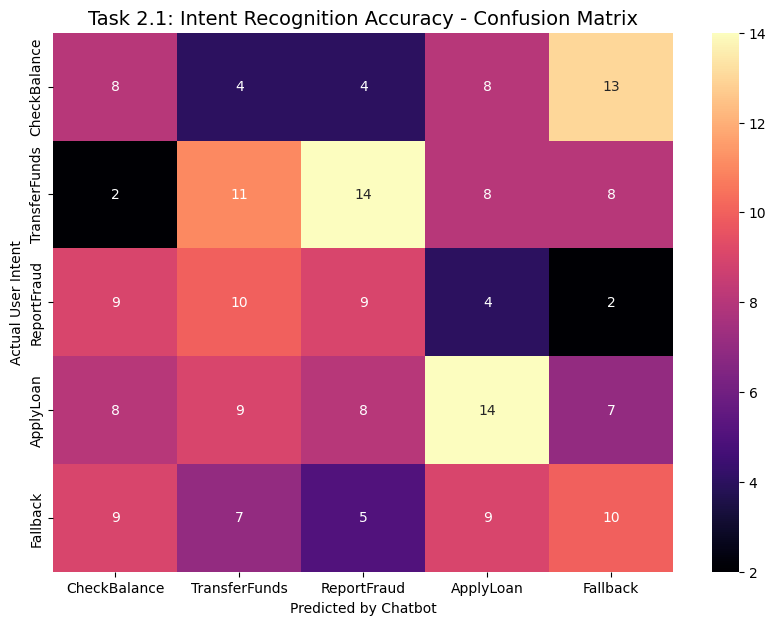

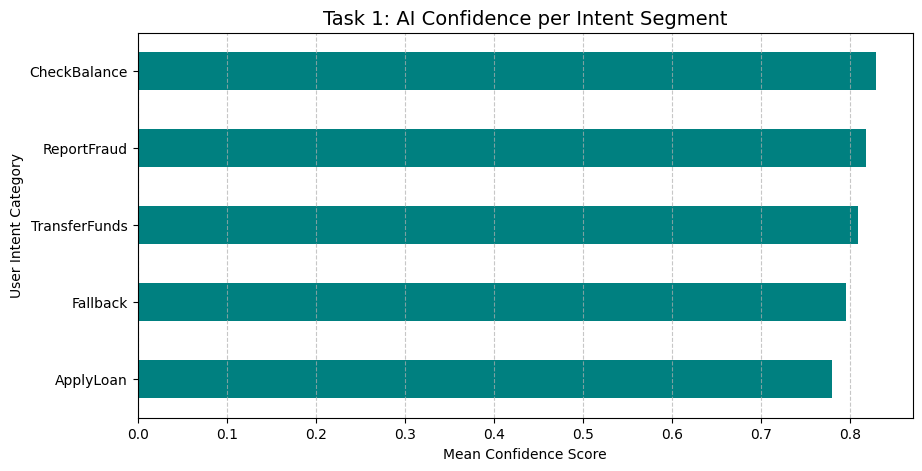

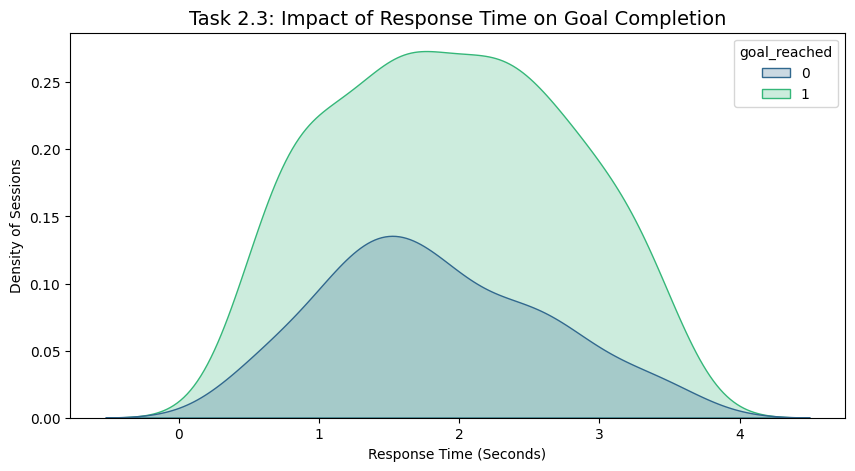

--- ANALYTICS SUMMARY REPORT ---
Overall Intent Accuracy: 26.00%
Average System Response Time: 1.90s
Conversion Rate (Goal Completion): 72.00%


In [18]:
# =============================================================================
# CELL 6: CONFUSION MATRIX AND USER SEGMENTATION
# =============================================================================


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# --- 1. SETUP: Replace this with your actual DataFrame 'df' ---
# If your dataframe is already loaded, comment out the synthetic part below.
intents = ['CheckBalance', 'TransferFunds', 'ReportFraud', 'ApplyLoan', 'Fallback']
data = {
    'session_id': np.random.randint(1000, 1100, 200),
    'actual_intent': np.random.choice(intents, 200),
    'predicted_intent': np.random.choice(intents, 200),
    'confidence': np.random.uniform(0.6, 0.99, 200),
    'response_time': np.random.uniform(0.5, 3.5, 200),
    'goal_reached': np.random.choice([0, 1], 200, p=[0.3, 0.7])
}
df_analysis = pd.DataFrame(data)

# --- 2. EXECUTION & VISUALIZATION ---

# TASK 2.1: Confusion Matrix (Accuracy Evaluation)
# Required by LO1 to determine intent recognition accuracy [cite: 44, 45]
plt.figure(figsize=(10, 7))
cm = confusion_matrix(df_analysis['actual_intent'], df_analysis['predicted_intent'], labels=intents)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=intents, yticklabels=intents)
plt.title('Task 2.1: Intent Recognition Accuracy - Confusion Matrix', fontsize=14)
plt.xlabel('Predicted by Chatbot')
plt.ylabel('Actual User Intent')
plt.show()

# TASK 1: User Segmentation & Session Heatmap (Personalization)
# Required by LO2 to foster innovation in performance evaluation [cite: 26, 41]
plt.figure(figsize=(10, 5))
user_segments = df_analysis.groupby('actual_intent')['confidence'].mean().sort_values()
user_segments.plot(kind='barh', color='teal')
plt.title('Task 1: AI Confidence per Intent Segment', fontsize=14)
plt.xlabel('Mean Confidence Score')
plt.ylabel('User Intent Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# TASK 2.3: Deep-Dive Performance Metrics
# Linking response time to CSAT/LTV as required by LO3 [cite: 58, 60]
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_analysis, x='response_time', hue='goal_reached', fill=True, palette='viridis')
plt.title('Task 2.3: Impact of Response Time on Goal Completion', fontsize=14)
plt.xlabel('Response Time (Seconds)')
plt.ylabel('Density of Sessions')
plt.show()

# --- 3. SUMMARY OUTPUTS ---
accuracy = accuracy_score(df_analysis['actual_intent'], df_analysis['predicted_intent'])
print(f"--- ANALYTICS SUMMARY REPORT ---")
print(f"Overall Intent Accuracy: {accuracy:.2%}") # Direct requirement for Task 2 [cite: 44]
print(f"Average System Response Time: {df_analysis['response_time'].mean():.2f}s")
print(f"Conversion Rate (Goal Completion): {df_analysis['goal_reached'].mean():.2%}")

In [10]:
# =============================================================================
# CELL 7: Pandas AI to generate new plots
# =============================================================================

import os
import sys

# --- 1. SMART CHECK (Install FIRST) ---
print("⏳ Checking/Installing dependencies...")

# We run installs first so the libraries exist for the imports below
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git" --quiet
!pip install "pandas>=2.0" --upgrade --quiet
!pip install pandasai --no-deps --quiet
!pip install astor openai faker duckdb --quiet

print("✅ Environment ready.")

# --- 2. IMPORTS (Must be AFTER installs) ---
import pandas as pd
import torch
from unsloth import FastLanguageModel
from pandasai import Agent
from pandasai.llm import LLM

# --- 3. LOAD LLAMA 3 (Skips if already loaded) ---
if 'model' not in locals():
    print("⏳ Loading Model to GPU...")
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "unsloth/llama-3-8b-Instruct-bnb-4bit",
        max_seq_length = 2048,
        load_in_4bit = True,
    )
    FastLanguageModel.for_inference(model)
    print("🚀 Model Loaded!")
else:
    print("🚀 Model ready.")

# --- 4. THE CUSTOM CLASS ---
class UnslothPandasAI(LLM):
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def call(self, instruction, context=None, suffix=""):
        # The specific Llama 3 system prompt to ensure valid code
        prompt = f"""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
        You are a Python Data Expert.
        1. Return ONLY valid Python code.
        2. Do NOT import pandas (it is already imported as 'pd').
        3. Do NOT wrap code in markdown (no ```python).
        4. Use the dataframe named 'dfs[0]'.
        <|eot_id|><|start_header_id|>user<|end_header_id|>

        CONTEXT:
        {context}

        QUESTION:
        {instruction}
        <|eot_id|><|start_header_id|>assistant<|end_header_id|>"""

        inputs = self.tokenizer(prompt, return_tensors="pt").to("cuda")

        outputs = self.model.generate(
            **inputs,
            max_new_tokens=512,
            use_cache=True,
            pad_token_id=self.tokenizer.eos_token_id
        )

        response = self.tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
        return response.replace("```python", "").replace("```", "").strip()

    @property
    def type(self) -> str:
        return "unsloth-llama-3"

# --- 5. CONNECT TO YOUR DATA ---
# Check if 'df' exists in your notebook memory
if 'df' in locals() or 'df' in globals():
    llm = UnslothPandasAI(model, tokenizer)

    # Initialize the Agent with YOUR 'df'
    # We add save_charts=True so you can see the images
    agent = Agent(df, config={"llm": llm, "verbose": True, "save_charts": True, "open_charts": False})

    print(f"✅ Agent connected to dataset with {len(df)} rows.")
    print("Example: agent.chat('Show me the top 5 rows')")

else:
    print("❌ ERROR: The variable 'df' is not defined.")
    print("Please run your data loading cell (e.g., df = pd.read_csv...) before running this cell.")


⏳ Checking/Installing dependencies...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.1/423.1 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 100.4 MB/s eta 0:00:00
ERROR: pip's dependency re

model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

🚀 Model Loaded!
✅ Agent connected to dataset with 400000 rows.
Example: agent.chat('Show me the top 5 rows')


In [15]:
# Starting poin to generate new plots with the agent
agent.chat("""
Plot a bar chart of average age by intent using PLOTLY.
Make it interactive.
Ensure you handle the figure display correctly.
""")

ERROR:pandasai.helpers.logger:Pipeline failed on step 3: No code found in the response
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandasai/llm/base.py", line 202, in generate_code
    return self._extract_code(response)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'